In [ ]:
from ipyblender_experimental import Counter

Counter()

Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing Light
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing Camera
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing Camera.001
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing light
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing Camera.002
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing light.001
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing Camera.003
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing light.002
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing Camera.004
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing light.003
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing Camera.005
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing light.004
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing Camera.006
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing light.005
Fra:1 Mem:14.37M (Peak 14.37M) | Time:00:00.00 | Syncing Camera.007

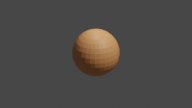

In [13]:
import bpy
from IPython.display import display, Image
from pathlib import Path
import base64

# Clear all existing mesh objects
bpy.ops.object.select_all(action='DESELECT')
bpy.ops.object.select_by_type(type='MESH')
bpy.ops.object.delete()

# Create a new sphere mesh
bpy.ops.mesh.primitive_uv_sphere_add(radius=1, enter_editmode=False, align='WORLD', location=(0, 0, 0))
sphere = bpy.context.active_object

# Rainbow colors (R, G, B, A)
rainbow_colors = [
    (0.941, 0.129, 0.427, 1),  # Red
    (0.933, 0.376, 0.133, 1),  # Orange
    (0.929, 0.725, 0.133, 1),  # Yellow
    (0.525, 0.808, 0.141, 1),  # Green
    (0.133, 0.702, 0.933, 1),  # Blue
    (0.141, 0.349, 0.808, 1),  # Indigo
    (0.639, 0.141, 0.808, 1),  # Violet
]

# Counter variable
counter = 1  # For example

# Create a material with the color based on the counter
material = bpy.data.materials.new(name="Rainbow Material")
material.use_nodes = True
nodes = material.node_tree.nodes
nodes["Principled BSDF"].inputs["Base Color"].default_value = rainbow_colors[counter%7]

# Assign the material to the sphere
sphere.data.materials.append(material)
# Setup the camera
camera = bpy.data.cameras.new("Camera")
camera_obj = bpy.data.objects.new("Camera", camera)
bpy.context.collection.objects.link(camera_obj)
camera_obj.location = (0, -5, 0)  # Position the camera in front of the sphere
camera_obj.rotation_euler = (1.5708, 0, 0)  # Point the camera towards the sphere

# Setup lighting
light_data = bpy.data.lights.new(name="light", type='POINT')
light_object = bpy.data.objects.new(name="light", object_data=light_data)
bpy.context.collection.objects.link(light_object)
light_object.location = (0, 0, 3)

# Render settings
bpy.context.scene.render.resolution_x = 192
bpy.context.scene.render.resolution_y = 108
bpy.context.scene.render.image_settings.file_format = 'PNG'
bpy.context.scene.render.filepath = "test_sphere.png" 

# Render the image
bpy.ops.render.render(write_still=True)

# Save the image to the specified filepath
bpy.data.images['Render Result'].save_render(filepath=bpy.context.scene.render.filepath)

Image("test_sphere.png")

# # Read the saved image into memory and encode it to base64
# temp_filepath = Path(bpy.context.scene.render.filepath)
# with temp_filepath.open('rb') as f:
#     my_img = base64.b64encode(f.read()).decode('utf-8')

# # Optionally, you can delete the temporary saved image
# temp_filepath.unlink()

# # Display the image
# print(my_img)